# Coins, and their beta coefficients

### Generate a dataset

In [1]:
import numpy as np

In [2]:
n = 500000

X = np.random.randint(0, 100, size=(n, 4))

In [3]:
X

array([[41, 30, 74, 92],
       [36, 25, 63, 47],
       [43, 33, 58, 61],
       ..., 
       [32, 32, 98, 99],
       [29, 39, 86, 41],
       [22, 60, 13, 15]])

In [4]:
y = X[:,0] * 0.01 + X[:,1] * 0.05 + X[:,2] * 0.10 + X[:,3] * 0.25   +   np.random.normal(0.0, 2.5, size=(n,))

In [5]:
print y.shape
print y

(500000,)
[ 33.4527307   15.27486877  21.45897857 ...,  36.98267025  17.85941964
  10.15391656]


### Fit a linear regression model

In [6]:
from statsmodels.regression.linear_model import OLS

In [7]:
model = OLS(y, X)

In [8]:
results = model.fit()

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 9.518e+06
Date:                Wed, 12 Apr 2017   Prob (F-statistic):               0.00
Time:                        13:22:12   Log-Likelihood:            -1.1671e+06
No. Observations:              500000   AIC:                         2.334e+06
Df Residuals:                  499996   BIC:                         2.334e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0099      0.000     92.186      0.000       0.010       0.010
x2             0.0501      0.000    467.112      0.000       0.050       0.050
x3             0.1001      0.000    932.473      0.000       0.100       0.100
x4             0.2499      0.000   2328.795      0.000       0.250       0.250
==============================================================================
Omnibus:                        2.006   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                2.009
Skew:                          -0.003   Prob(JB):                        0.366
Kurtosis:                       2.993   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Feature Engineering (aka, add #coins feature)

In [10]:
n_coins = np.sum(X, axis=1)

In [11]:
n_coins = n_coins.reshape((n, 1))

In [12]:
X = np.concatenate((X, n_coins), axis=1)

In [13]:
model = OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 9.518e+06
Date:                Wed, 12 Apr 2017   Prob (F-statistic):               0.00
Time:                        13:22:17   Log-Likelihood:            -1.1671e+06
No. Observations:              500000   AIC:                         2.334e+06
Df Residuals:                  499996   BIC:                         2.334e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0721      0.000   -680.319      0.000      -0.072      -0.072
x2            -0.0319      0.000   -300.575      0.000      -0.032      -0.032
x3             0.0181      0.000    170.693      0.000       0.018       0.018
x4             0.1679      0.000   1583.966      0.000       0.168       0.168
x5             0.0820   1.37e-05   5987.334      0.000       0.082       0.082
==============================================================================
Omnibus:                        2.006   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                2.009
Skew:                          -0.003   Prob(JB):                        0.366
Kurtosis:                       2.993   Cond. No.                     4.27e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Plot num_coins vs total value

In [14]:
%matplotlib inline

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(X, columns=['#p', '#n', '#d', '#q', '# coins'])

In [17]:
df['total value'] = y

In [18]:
df.head()

,#p,#n,#d,#q,# coins,total value
0,41,30,74,92,237,33.452731
1,36,25,63,47,171,15.274869
2,43,33,58,61,195,21.458979
3,95,87,17,93,292,30.448688
4,10,65,80,76,231,31.852102


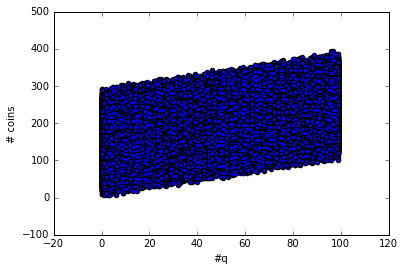

In [19]:
df.plot('#q', '# coins', kind='scatter')